# Final Project

In [1]:
print("我準備好了")


我準備好了


In [4]:
import auto_update
#記得要去三大法人爬蟲更新籌碼面指標

twse_divide_ratio -- 資料日期
twse_divide_ratio -- 股票代號
twse_divide_ratio -- 股票名稱
twse_divide_ratio -- 除權息前收盤價
twse_divide_ratio -- 除權息參考價
twse_divide_ratio -- 權值+息值
twse_divide_ratio -- 權/息
twse_divide_ratio -- 漲停價格
twse_divide_ratio -- 跌停價格
twse_divide_ratio -- 開盤競價基準
twse_divide_ratio -- 減除股利參考價
twse_divide_ratio -- 詳細資料
twse_divide_ratio -- 最近一次申報資料 季別/日期
twse_divide_ratio -- 最近一次申報每股 (單位)淨值
twse_divide_ratio -- 最近一次申報每股 (單位)盈餘
twse_divide_ratio -- twse_divide_ratio
otc_divide_ratio -- 除權息日期
otc_divide_ratio -- 代號
otc_divide_ratio -- 名稱
otc_divide_ratio -- 除權息前收盤價
otc_divide_ratio -- 除權息參考價
otc_divide_ratio -- 權值
otc_divide_ratio -- 息值
otc_divide_ratio -- 權+息值
otc_divide_ratio -- 權/息
otc_divide_ratio -- 漲停價格
otc_divide_ratio -- 跌停價格
otc_divide_ratio -- 開盤競價基準
otc_divide_ratio -- 減除股利參考價
otc_divide_ratio -- 現金股利
otc_divide_ratio -- 每千股無償配股
otc_divide_ratio -- -
otc_divide_ratio -- 現金增資股數
otc_divide_ratio -- 現金增資認購價
otc_divide_ratio -- 公開承銷股數
otc_divide_ratio -- 員工認購股數
otc_divide_ratio -

### 獲取歷史資料

In [1]:
from finlab.data import Data
from finlab_old.data import Data as data1
import pandas as pd
import sqlite3
import os
import numpy as np
import datetime
import numpy as np
from finlab import ml
import pandas_profiling
conn = sqlite3.connect(os.path.join('data', 'data.db'))
pd = pd.read_sql('select * from legal_person',conn,index_col = ['date'])
## 上面沒有整理

data1 = data1()


data = Data()

big = data1.get('三大法人買賣超股數',10000000).fillna(0)
#big0 = data1.get('外陸資買賣超股數(不含外資自營商)',10000000).fillna(0)
#le0 = data1.get('外資買進股數',10000000).fillna(0)
#le1 = data1.get('投信買進股數',10000000).fillna(0)
#le3 = data1.get('三大法人買超股數',10000000).fillna(0)
#bigm = big.rolling(3).sum()
rev = data.get("當月營收")
close = data.get("收盤價")
pbe = data.get('股價淨值比')
pe = data.get('本益比')
rev.index = rev.index.shift(5, "d")
#取決於幾號買賣
#total = big0+big
#q = ml.fundamental_features()
#a = q>0
#free_m_ratio = q["R205_現金流量比率"]
#twii= data.get("發行量加權股價指數")

### 計算features

In [165]:
def legal(n):
    legal = big.rolling(n,min_periods=1).sum()
    #legal = legal.replace([np.inf, -np.inf], np.nan).fillna(0)
    return legal

def SMA(n):
    return close.rolling(n, min_periods=1).mean()/n

def bias(n):
    return close / close.rolling(n, min_periods=1).mean()

def acc(n):
    return close.shift(n) / (close.shift(2*n) + close) * 2

def rsv(n):
    l = close.rolling(n, min_periods=1).min()
    h = close.rolling(n, min_periods=1).max()
    
    return (close - l) / (h - l)

def mom(n):
    return (rev / rev.shift(1)).shift(n)

features = {
    'mom1': mom(1),
    'mom2': mom(2),
    'mom3': mom(3),
    'mom4': mom(4),
    'mom5': mom(5),
    'mom6': mom(6),
    'mom7': mom(7),
    'mom8': mom(8),
    'mom9': mom(9),
    
    'bias5': bias(5),
    'bias10': bias(10),
    'bias20': bias(20),
    'bias60': bias(60),
    'bias120': bias(120),
    'bias240': bias(240),
    
    'acc5': acc(5),
    'acc10': acc(10),
    'acc20': acc(20),
    'acc60': acc(60),
    'acc120': acc(120),
    'acc240': acc(240),
    
    "SMA5":SMA(5),
    "SMA10":SMA(10),
    "SMA20":SMA(20),
    "SMA60":SMA(60),
    "SMA120":SMA(120),
    "SMA240":SMA(240),
    
    
    
    'pe':pe,
    'pbe':pbe,
    
    

    
}
 #  'legal5':legal(5),
 #  'legal10':legal(10),
 #  'legal20':legal(20),
 #  'legal60':legal(60),
 #  'legal120':legal(120),
 #  'legal240':legal(240),
  #  'rsv5': rsv(5),
  #  'rsv10': rsv(10),
  #  'rsv20': rsv(20),
  #  'rsv60': rsv(60),
  #  'rsv120': rsv(120),
  #  'rsv240': rsv(240),
   # 'big1':big1,
   # 'big2':big2,
   # 'big3':big3,

In [109]:
for name, f in features.items():
    print(f)

stock_id        1101      1102      1103      1104      1107      1108  \
date                                                                     
2005-02-15       NaN       NaN       NaN       NaN       NaN       NaN   
2005-03-15       NaN       NaN       NaN       NaN       NaN       NaN   
2005-04-15  0.570159  0.606259  0.578645  0.587014  0.845409  0.479826   
2005-05-15  1.599304  1.458606  1.496349  1.452597  2.541776  2.006171   
2005-06-15  0.965557  0.905374  1.000349  1.021096  0.552665  1.002925   
2005-07-15  0.990010  1.066190  0.941188  1.028183  1.010621  0.916059   
2005-08-15  0.950914  0.896896  1.094459  0.706112  0.471162  0.995380   
2005-09-15  1.011303  0.985240  0.875028  1.319102  1.280335  1.030297   
2005-10-15  0.973469  1.034137  1.042994  0.898538  1.229129  1.029424   
2005-11-15  1.061597  1.005414  1.017675  1.064519  0.948520  0.941900   
2005-12-15  1.030617  1.002413  1.083925  1.078743  0.605380  1.105454   
2006-01-15  1.037238  1.101662  1.0791

### 製作dataset

##### 設定買賣頻率

In [110]:
every_month = rev.index
every_month
every_day = close.index
every_day

DatetimeIndex(['2007-04-23', '2007-04-24', '2007-04-25', '2007-04-26',
               '2007-04-27', '2007-04-30', '2007-05-02', '2007-05-03',
               '2007-05-04', '2007-05-07',
               ...
               '2019-10-28', '2019-10-29', '2019-10-30', '2019-10-31',
               '2019-11-01', '2019-11-04', '2019-11-05', '2019-11-06',
               '2019-11-07', '2019-11-08'],
              dtype='datetime64[ns]', name='date', length=3104, freq=None)

In [ ]:
##try

In [166]:
for name, f in features.items():
    features[name] = f.reindex(every_day, method='ffill')

In [167]:
for name, f in features.items():
    features[name] = f.unstack()

In [179]:

for name, f in features.items():
    
    feateur_2018 = f.index.get_level_values(1)[3000:]
    f[feateur_2018]
    print(f)
    

TypeError: Argument 'tuples' has incorrect type (expected numpy.ndarray, got DatetimeArray)

In [188]:

s = features['mom1']['1101'][3000:]
features['mom1'].index.get_level_values(1)[]

SyntaxError: can't assign to function call (<ipython-input-188-3d0d4e1e50c4>, line 3)

In [187]:
s

date
2019-06-11    2.138954
2019-06-12    2.138954
2019-06-13    2.138954
2019-06-14    2.138954
2019-06-17    0.974201
2019-06-18    0.974201
2019-06-19    0.974201
2019-06-20    0.974201
2019-06-21    0.974201
2019-06-24    0.974201
2019-06-25    0.974201
2019-06-26    0.974201
2019-06-27    0.974201
2019-06-28    0.974201
2019-07-01    0.974201
2019-07-02    0.974201
2019-07-03    0.974201
2019-07-04    0.974201
2019-07-05    0.974201
2019-07-08    0.974201
2019-07-09    0.974201
2019-07-10    0.974201
2019-07-11    0.974201
2019-07-12    0.974201
2019-07-15    0.931161
2019-07-16    0.931161
2019-07-17    0.931161
2019-07-18    0.931161
2019-07-19    0.931161
2019-07-22    0.931161
                ...   
2019-09-25    1.000000
2019-09-26    1.000000
2019-09-27    1.000000
2019-10-01    1.000000
2019-10-02    1.000000
2019-10-03    1.000000
2019-10-04    1.000000
2019-10-07    1.000000
2019-10-08    1.000000
2019-10-09    1.000000
2019-10-14    1.000000
2019-10-15    0.975161
2019-1

In [141]:
import datetime
import time
s = datetime.datetime(2018,1,1)
type(s)

datetime.datetime

In [113]:
import pandas as pd
dataset = pd.DataFrame(features)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Dandy\Anaconda3\envs\finlab\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-113-0e17808393e5>", line 2, in <module>
    dataset = pd.DataFrame(features)
  File "C:\Users\Dandy\Anaconda3\envs\finlab\lib\site-packages\pandas\core\frame.py", line 392, in __init__
    mgr = init_dict(data, index, columns, dtype=dtype)
  File "C:\Users\Dandy\Anaconda3\envs\finlab\lib\site-packages\pandas\core\internals\construction.py", line 212, in init_dict
    return arrays_to_mgr(arrays, data_names, index, columns, dtype=dtype)
  File "C:\Users\Dandy\Anaconda3\envs\finlab\lib\site-packages\pandas\core\internals\construction.py", line 51, in arrays_to_mgr
    index = extract_index(arrays)
  File "C:\Users\Dandy\Anaconda3\envs\finlab\lib\site-packages\pandas\core\internals\construction.py", line 312, in extract_index
    index = _union_indexes(indexes

KeyboardInterrupt: 

In [ ]:
##end

##### 將dataframe 組裝起來

In [5]:
# features['bias20'].reindex(every_month, method='ffill')

for name, f in features.items():
    features[name] = f.reindex(every_month, method='ffill')

In [6]:

for name, f in features.items():
    features[name] = f.unstack()

In [7]:
import pandas as pd
dataset = pd.DataFrame(features)

In [8]:
feature_names = list(dataset.columns)

### 新增 label

In [9]:
from finlab import ml

ml.add_profit_prediction(dataset)
ml.add_rank_prediction(dataset)

In [10]:
import sklearn.preprocessing as preprocessing
dataset_scaled = pd.DataFrame(preprocessing.scale(dataset),index = dataset.index , columns = dataset.columns)
dataset_scaled["return"] = dataset["return"]
dataset_scaled["rank"] = dataset["rank"]
#dataset_scaled["free_m_ratio"] = dataset["free_m_ratio"]
# 可以把其他東西放回來 除了以下這些
#dataset['pe'] = dataset['pe'].rank(pct=True)
#dataset['pbe'] = dataset['pbe'].rank(pct=True)
#dataset['legal5'] = dataset['legal5'].rank(pct=True)
#dataset['legal10'] = dataset['legal10'].rank(pct=True)
#dataset['legal20'] = dataset['legal20'].rank(pct=True)
#dataset['legal60'] = dataset['legal60'].rank(pct=True)
#dataset['legal120'] = dataset['legal120'].rank(pct=True)
#dataset['legal240'] = dataset['legal240'].rank(pct=True)
#dataset['big2'] = dataset['big2'].rank(pct=True)
#dataset['big3'] = dataset['big3'].rank(pct=True)

In [90]:
dataset_scaled[dataset_scaled.index.get_level_values(1) =='2019-10-15']

,,mom1,mom2,mom3,mom4,mom5,mom6,mom7,mom8,mom9,bias5,...,SMA5,SMA10,SMA20,SMA60,SMA120,SMA240,pe,pbe,return,rank
stock_id,date,,,,,,,,,,,,,,,,,,,,,
0015,2019-10-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0050,2019-10-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.483627,...,0.529645,0.519860,0.513123,0.490144,0.480191,0.458831,NaN,NaN,NaN,NaN
0051,2019-10-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020096,...,-0.062427,-0.064545,-0.063797,-0.073776,-0.086000,-0.106527,NaN,NaN,NaN,NaN
0052,2019-10-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.590985,...,0.253028,0.242793,0.229936,0.202417,0.177541,0.147717,NaN,NaN,NaN,NaN
0053,2019-10-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.613626,...,-0.016222,-0.020580,-0.025278,-0.040306,-0.055097,-0.077033,NaN,NaN,NaN,NaN
0054,2019-10-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.354538,...,-0.191174,-0.192947,-0.191955,-0.197650,-0.205408,-0.220821,NaN,NaN,NaN,NaN
0055,2019-10-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.307543,...,-0.242950,-0.243254,-0.241873,-0.247385,-0.253750,-0.267254,NaN,NaN,NaN,NaN
0056,2019-10-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.069275,...,-0.131803,-0.134288,-0.135056,-0.143915,-0.151602,-0.168363,NaN,NaN,NaN,NaN
0057,2019-10-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.510583,...,0.169918,0.164790,0.161542,0.146580,0.135654,0.109882,NaN,NaN,NaN,NaN


### 刪除太大太小的歷史資料

In [11]:
print(dataset.shape)

dataset = ml.drop_extreme_case(dataset_scaled, 
    ['bias60', 'bias120', 'bias240', 'mom1', 'mom2', 'mom3', 'mom4', 'mom5', 'mom6']
                               ,thresh=0.01)

print(dataset.shape)


(342495, 31)
(320475, 31)


In [12]:
dataset_dropna = dataset.dropna(how='any')
dataset_dropna = dataset_dropna.reset_index().set_index("date")

## 開始改

## 結束改

In [13]:
dataset_train = dataset_dropna[:'2017']
dataset_test = dataset_dropna['2018':]

### 神經網路模型

In [25]:
import keras
from keras.initializers import he_normal
import os
from keras.layers.advanced_activations import LeakyReLU, PReLU
os.environ['KMP_DUPLICATE_LIB_OK']='True'
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, activation='relu',
                      input_shape=(len(feature_names),),
                      kernel_initializer=he_normal(seed=0)))

model.add(keras.layers.Dense(100, activation='relu',
                      kernel_initializer=he_normal(seed=0)))
model.add(keras.layers.Dropout(0.9))
model.add(keras.layers.Dense(1, activation='sigmoid'))


model.summary()

model.compile(loss='mean_squared_error',
              metrics=['accuracy'],
              optimizer="adam",)

print('start fitting')
history = model.fit(dataset_train[feature_names], dataset_train['rank'],
                    batch_size=1000,
                    epochs=250,
                    verbose=1,
                    validation_split=0.1, )
# 多加入matrics=accuracy

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               3000      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 13,201
Trainable params: 13,201
Non-trainable params: 0
_________________________________________________________________
start fitting
Train on 76921 samples, validate on 8547 samples
Epoch 1/225
76921/76921 [==============================] - ETA: 27s - loss: 0.1590 - acc: 0.0000e+ - ETA: 3s - loss: 0.1596 - acc: 0.0000e+00 - ETA: 1s - loss: 0.1489 - acc: 0.0000e+0 - ETA: 1s - loss: 0.140

In [35]:
model.save_weights("model.weight")

In [15]:
import keras
from keras.initializers import he_normal
import os
from keras.layers.advanced_activations import LeakyReLU, PReLU
os.environ['KMP_DUPLICATE_LIB_OK']='True'
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, activation='relu',
                      input_shape=(len(feature_names),),
                      kernel_initializer=he_normal(seed=0)))

model.add(keras.layers.Dense(100, activation='relu',
                      kernel_initializer=he_normal(seed=0)))
model.add(keras.layers.Dropout(0.9))
model.add(keras.layers.Dense(1, activation='sigmoid'))


model.summary()

model.compile(loss='mean_squared_error',
              metrics=['accuracy'],
              optimizer="adam",)
model.load_weights("model.weight", by_name=False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               3000      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 13,201
Trainable params: 13,201
Non-trainable params: 0
_________________________________________________________________


### 結果

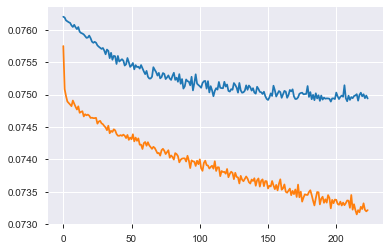

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['val_loss'][1:])
plt.plot(history.history['loss'][1:])

### lightgbm Model

In [16]:
import lightgbm as lgb
cf = lgb.LGBMRegressor(n_estimators=500)
cf.fit(dataset_train[feature_names].astype(float), dataset_train['rank'])

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### Random Forest Model

In [17]:
from sklearn.ensemble import RandomForestRegressor

cf2 = RandomForestRegressor(n_estimators=100)
cf2.fit(dataset_train[feature_names].astype(float), dataset_train['rank'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

## xgboost

In [ ]:
#import xgboost

#cf2 = xgboost.XGBRegressor(n_estimators=100)

#cf2.fit(dataset_train[feature_names].astype(float), dataset_train['rank'])

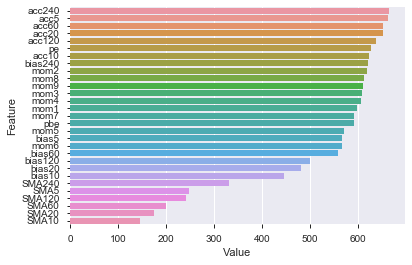

In [18]:
feature_imp = pd.DataFrame(zip(cf.feature_importances_, feature_names), 
                           columns=['Value','Feature']).sort_values('Value', ascending=False)
feature_imp

%matplotlib inline
import seaborn as sns
sns.barplot(x="Value", y="Feature", data=feature_imp)

### Ensemble learning

In [27]:
vals = model.predict(dataset_test[feature_names].astype(float))
dataset_test['result1'] = pd.Series(vals.swapaxes(0,1)[0], dataset_test.index)

vals = cf.predict(dataset_test[feature_names].astype(float))
dataset_test['result2'] = pd.Series(vals, dataset_test.index)

vals = cf2.predict(dataset_test[feature_names].astype(float))
dataset_test['result3'] = pd.Series(vals, dataset_test.index)

C:\Users\Dandy\Anaconda3\envs\finlab\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dandy\Anaconda3\envs\finlab\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Dandy\Anaconda3\envs\finlab\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

## 原本的

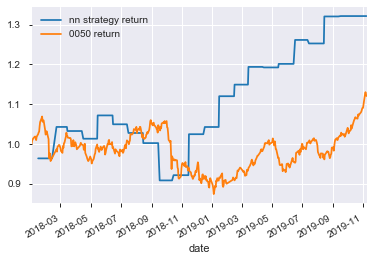

In [28]:
import math


dates = sorted(list(set(dataset_test.index)))

rs = []
for d in dates:
    
    dataset_time = dataset_test.loc[d]
    rank = dataset_time['result1'] + dataset_time['result2'] + dataset_time['result3'] 
    
    condition = (rank >= rank.nlargest(20).iloc[-1]) 
    r = dataset_time['return'][condition].mean()

    rs.append(r * (1-3/1000-1.425/1000*2*0.6))

rs = pd.Series(rs, index=dates).cumprod()

s0050 = close['0050']['2018':]

pd.DataFrame({'nn strategy return':rs.reindex(s0050.index, method='ffill'), '0050 return':s0050/s0050[0]}).plot()


In [29]:
rs[-1]

1.3212181837267576

## 添加三大反人條件

In [22]:
#(外資+投信+自營商-外資借券).rolling(N1).sum()
#每月15號選出rank前(N2)的股票進行買入
# N1天內法人的增加張數要超過N3張
def leg(n1,n3):
    condition1 = big.rolling(n1).sum() >n3*1000
    return condition1

def rs1(n1,n2,n3):
    import pandas as pd
    dates = sorted(list(set(dataset_test.index)))
    rs = []
    for d in dates:
        
        
        dataset_time = dataset_test.loc[d]
        rank = dataset_time['result1'] + dataset_time['result2'] + dataset_time['result3'] 
            
        condition = (rank >= rank.nlargest(n2).iloc[-1]) 
        #r = dataset_time['return'][condition].mean()
            # 開始蝦七八亂改
        rk = dataset_time[condition]['stock_id']
        rd = []
        for n in rk:
            rd.append(n)
    
    #condition1 = big.rolling(n1).sum() >n3*1000
        condition1 = leg(n1,n3)
        #condition1 = lambda x:big.rolling(n1).sum() > n3*1000
        con = pd.DataFrame(condition1.unstack()[rd])
    #con1 = con.pivot_table(index="stock_id",columns="date")
        con0 = con.pivot_table(index="date",columns="stock_id")
        con01 = con0.reindex(every_month, method='ffill').dropna()
        con02 = con01.loc[d][0]
        con03 = con02[con02]
        con04=[]
        for i in con03.index:
            con04.append(i)
            
        test = dataset_time.reset_index().set_index("stock_id")
        lo = test["return"][con04].mean()
        #lo = lo.dropna()
        
         #結束蝦七八亂改
        rs.append(lo * (1-3/1000-1.425/1000*2*0.6))
            
    rs = pd.Series(rs, index=dates).cumprod()
    return rs,con04,condition

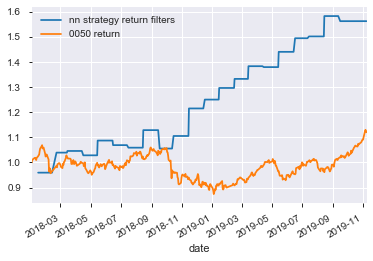

In [33]:
#(68,20,11),(38,17,4)
# 參數尚未最佳化
rs_legal,l,condition_legal = rs1(68,20,11)
rs_legal = pd.Series(rs_legal, index=dates)

s0050 = close['0050']['2018':]

pd.DataFrame({'nn strategy return filters':rs_legal.reindex(s0050.index, method='ffill'), '0050 return':s0050/s0050[0]}).plot()

In [34]:
rs_legal[-1]

1.5627988057445428

In [5]:
def buy_stock(position, lowest_fee = 20, add_cost=10, discount=1):
    from cmoney.stock import VirtualStockAccount
    vs = VirtualStockAccount('0962041028','f8859373')
    # get total money
    account_info = vs.info()
    #money = int(account_info['AllAssets'].replace(',', ''))
    money = 100000

    print('total money', money)

    # get price of the stock
    import time
    infos = {}
    if isinstance(position, pd.Series):
        slist = position[(position != 0)].index.tolist()
    elif isinstance(position, list):
        slist = position
    else:
        raise Exception("type of position should be pd.Series or list")

    for sid in slist:
        print(sid)
        infos[sid] = vs.get_price(sid) # RefPrice
        time.sleep(2)

    # format dataframe and series
    price = pd.Series({sid:info['StockInfo']['RefPrice'] for sid, info in infos.items() if info is not None})
    none_stock_ids = [sid for sid, info in infos.items() if info is None]
    if none_stock_ids:
        print('**WARRN: there are stock cannot find info', none_stock_ids)

    stock_list = price.dropna().transpose()

    # rebalance stocks
    while (money / len(stock_list)) < (lowest_fee - add_cost) * 1000 / 1.425 / discount:
        stock_list = stock_list.loc[stock_list != stock_list.max()]

    while True:
        invest_amount = (money / len(stock_list))
        ret = np.floor(invest_amount / stock_list / 1000)

        if (ret == 0).any():
            stock_list = stock_list.loc[stock_list != stock_list.max()]
        else:
            break

    slist = ret.to_dict()
    vs.rebalance(slist)

['aid=580762', 'aid=']
accounts ['580762']
current account 580762


In [2]:
l = ['1103',
 '1309',
 '1521',
 '2034',
 '2359',
 '2385',
 '2427',
 '2906',
 '3014',
 '3029',
 '3622',
 '4144',
 '5434',
 '6184',
 '8271']

In [16]:
#自動分配
vs.sync(l)

total money 2000000
1103
1309
1521
2034
2359
2385
2427
2906
3014
3029
3622
4144
5434
6184
8271
buy  1103 7.0
buy  1309 11.0
buy  1521 2.0
buy  2034 5.0
buy  2359 6.0
buy  2385 1.0
buy  2427 12.0
buy  2906 11.0
buy  3014 3.0
buy  3029 4.0
buy  3622 6.0
buy  4144 4.0
buy  5434 1.0
buy  6184 3.0
buy  8271 4.0


In [12]:
#取得每股價錢加下單
import math
My_acount=200000
for i in l:    
    price = float(vs.get_price(i)['SalePrice'])*1000
    #print(price)
    price_each_stock=My_acount / len(l)
    number_we_need = math.floor(price_each_stock/price)
    #print('stock_price:',+price,"\nThe number of stocks:",+number_we_need)
    vs.sync(['1101', '2330'])

19000.0
stock_price: 19000.0 
The number of stocks: 0
total money 2000000
1101
2330
buy  1101 24.0
buy  2330 3.0
11350.0
stock_price: 11350.0 
The number of stocks: 1
total money 2000000
1101
2330
buy  1101 24.0
buy  2330 3.0
66200.0
stock_price: 66200.0 
The number of stocks: 0
total money 2000000
1101
2330
buy  1101 24.0
buy  2330 3.0
26250.0
stock_price: 26250.0 
The number of stocks: 0
total money 2000000
1101
2330
buy  1101 24.0
buy  2330 3.0
20650.0
stock_price: 20650.0 
The number of stocks: 0
total money 2000000
1101
2330
buy  1101 24.0
buy  2330 3.0
94800.0
stock_price: 94800.0 
The number of stocks: 0
total money 2000000
1101
2330
buy  1101 24.0
buy  2330 3.0
10700.0
stock_price: 10700.0 
The number of stocks: 1
total money 2000000
1101
2330
buy  1101 24.0
buy  2330 3.0
11500.0
stock_price: 11500.0 
The number of stocks: 1
total money 2000000
1101
2330
buy  1101 24.0
buy  2330 3.0
44800.0
stock_price: 44800.0 
The number of stocks: 0
total money 2000000
1101
2330
buy  1101 24

In [6]:
vs.sync(['1101', '2330'])

total money 2000000
1101
2330
buy  1101 24.0
buy  2330 3.0


In [ ]:
vs.cancel_all_orders()

8271
6184
5434
4144
3622
3029
3014
2906
2427
2385


In [15]:
vs.get_orders()

[]

## 加入自動化

In [113]:
# 自動分配持股（平均分散總資產）（通常我會用這個）
vs.sync(['1101', '2330'])

# ------ #
# 委託操作
# ------ # 

# 查看目前的委託單
vs.get_orders()

# 刪除所有委託單
vs.cancel_all_orders()

[{'Id': '8271',
  'Name': '宇瞻',
  'TkT': "<span class='c1'>現股<br>買進</span>",
  'OrdPr': '漲停價',
  'OrdQty': '4',
  'DeAvgPr': '0.00',
  'DeQty': '0',
  'UnPay': '0',
  'Time': '2019/11/03 22:35:20',
  'StMsg': '預約成功',
  'StCode': '20',
  'CanDel': '1',
  'CNo': '19567795',
  'NoteId': '0',
  'IsPublicNote': '0',
  'BoardLostSize': '1000',
  'IsWarrant': '0'},
 {'Id': '6184',
  'Name': '大豐電',
  'TkT': "<span class='c1'>現股<br>買進</span>",
  'OrdPr': '漲停價',
  'OrdQty': '3',
  'DeAvgPr': '0.00',
  'DeQty': '0',
  'UnPay': '0',
  'Time': '2019/11/03 22:35:19',
  'StMsg': '預約成功',
  'StCode': '20',
  'CanDel': '1',
  'CNo': '19567794',
  'NoteId': '0',
  'IsPublicNote': '0',
  'BoardLostSize': '1000',
  'IsWarrant': '0'},
 {'Id': '5434',
  'Name': '崇越',
  'TkT': "<span class='c1'>現股<br>買進</span>",
  'OrdPr': '漲停價',
  'OrdQty': '1',
  'DeAvgPr': '0.00',
  'DeQty': '0',
  'UnPay': '0',
  'Time': '2019/11/03 22:35:17',
  'StMsg': '預約成功',
  'StCode': '20',
  'CanDel': '1',
  'CNo': '19567793',
  'N

In [67]:
vs.cancel_all_orders()

1102
1101


In [45]:
from cmoney import VirtualStockAccount
vs = VirtualStockAccount('0962041028','f8859373')
vs.info

['aid=580762', 'aid=']
accounts ['580762']
current account 580762


<bound method VirtualStockAccount.info of <cmoney.stock.VirtualStockAccount object at 0x0000014E4C5AB5C0>>

In [66]:
slist = ['1101','1102']
buy_stock(slist)


['aid=580762', 'aid=']
accounts ['580762']
current account 580762
total money 100000
1101
1102
buy  1101 1.0
buy  1102 1.0


In [65]:
def buy_stock(position, lowest_fee = 20, add_cost=10, discount=1):
    from cmoney.stock import VirtualStockAccount
    vs = VirtualStockAccount('0962041028','f8859373')
    # get total money
    account_info = vs.info()
    #money = int(account_info['AllAssets'].replace(',', ''))
    money = 100000

    print('total money', money)

    # get price of the stock
    import time
    infos = {}
    if isinstance(position, pd.Series):
        slist = position[(position != 0)].index.tolist()
    elif isinstance(position, list):
        slist = position
    else:
        raise Exception("type of position should be pd.Series or list")

    for sid in slist:
        print(sid)
        infos[sid] = vs.get_price(sid) # RefPrice
        time.sleep(2)

    # format dataframe and series
    price = pd.Series({sid:info['StockInfo']['RefPrice'] for sid, info in infos.items() if info is not None})
    none_stock_ids = [sid for sid, info in infos.items() if info is None]
    if none_stock_ids:
        print('**WARRN: there are stock cannot find info', none_stock_ids)

    stock_list = price.dropna().transpose()

    # rebalance stocks
    while (money / len(stock_list)) < (lowest_fee - add_cost) * 1000 / 1.425 / discount:
        stock_list = stock_list.loc[stock_list != stock_list.max()]

    while True:
        invest_amount = (money / len(stock_list))
        ret = np.floor(invest_amount / stock_list / 1000)

        if (ret == 0).any():
            stock_list = stock_list.loc[stock_list != stock_list.max()]
        else:
            break

    slist = ret.to_dict()
    vs.rebalance(slist)

In [ ]:
#(外資+投信+自營商-外資借券).rolling(N1).sum()
#每月15號選出rank前(N2)的股票進行買入
# N1天內法人的增加張數要超過N3張
import tqdm
rmax = 0
n1 = []
for i in tqdm.tqdm_notebook(range(1,100,10)):
    try:
        r,c,condition = rs1(i,50,1)
        rsn = r[-1]
        rmax = 0
        if rmax<rsn:
            rmax = rsn
            print(rmax,i)
            n1.append(i)
        else:
            print(i)
    except:
        pass
    continue

In [ ]:
n1

In [ ]:
import tqdm


n3=[]
#for i in n1:
for k in tqdm.tqdm_notebook(range(1,60,1)):
    try:
        r,c,condition = rs1(38,50,k)
        rsn = r[-1]
        if rmax<rsn:
            
            rmax = rsn
            print(rmax,k)
            
            n3.append(k)
        else:
            print(i,k)
    except:
        pass
    continue

In [ ]:
r,c,condition = rs1(38,50,1)
rsn = r[-1]
rmax = 0
if rmax<rsn:

    rmax = rsn
    print(rmax,1)

    #n3.append(k)

In [ ]:
r,c,condition = rs1(38,50,1)

In [ ]:
rmax

In [ ]:
r,c = rs1(60,50,k)
rsn = r[-1]
if rmax<rsn:
    
    rmax = rsn
    print(rmax,k)
    
    n3.append(k)

In [ ]:

n3

In [ ]:
#step3
n2 = []


for j in tqdm.tqdm_notebook(range(1,100,1)):
    try:
        r,c,con = rs1(38,j,4)
        rsn = r[-1]
        if rmax<rsn:
            rmax = rsn
            print(rmax,j)
            n2.append(j)
        else:
            print(j)
    except:
        pass
    continue

In [ ]:
#we got n1,n2,n3
#r,l = rs1()

In [ ]:
rs_legal

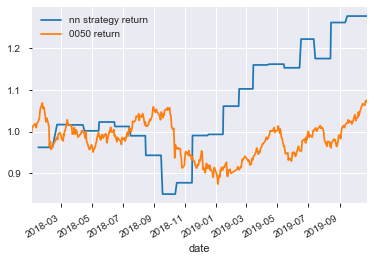

In [24]:
import pandas as pd
rs_legal,l,condition = rs1(68,20,11)
rs_legal = pd.Series(rs, index=dates)

s0050 = close['0050']['2018':]

pd.DataFrame({'nn strategy return':rs_legal.reindex(s0050.index, method='ffill'), '0050 return':s0050/s0050[0]}).plot()



In [25]:
rs_legal[-1]

1.277500492921283

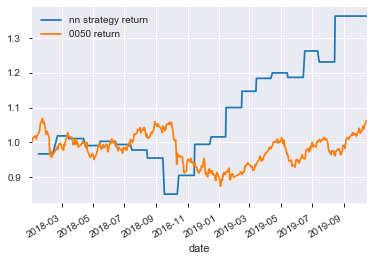

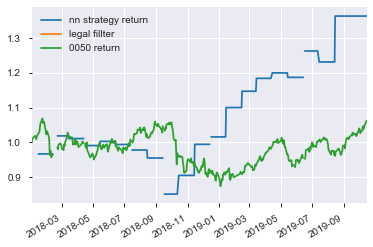

In [25]:
import math
import pandas as pd

dates = sorted(list(set(dataset_test.index)))

rs = []
for d in dates:
    
    dataset_time = dataset_test.loc[d]
    rank = dataset_time['result1'] + dataset_time['result2'] + dataset_time['result3'] 
    
    condition = (rank >= rank.nlargest(20).iloc[-1]) 
    r = dataset_time['return'][condition].mean()

    rs.append(r * (1-3/1000-1.425/1000*2*0.6))

rs = pd.Series(rs, index=dates).cumprod()

s0050 = close['0050']['2018':]

pd.DataFrame({'nn strategy return':rs.reindex(s0050.index, method='ffill'), '0050 return':s0050/s0050[0]}).plot()

rs_legal,l,condition = rs1(68,20,11)
rs_legal = pd.Series(rs, index=dates)

s0050 = close['0050']['2018':]

pd.DataFrame({'nn strategy return':rs.reindex(s0050.index, method='ffill') ,'legal fillter':rs_legal , '0050 return':s0050/s0050[0]}).plot()

In [26]:
rs[-1]

1.3630837149577797

In [28]:
rank[l]

TypeError: 'NoneType' object is not iterable

## 剛月持股

In [ ]:
# get the latest dataset

last_date = dataset.index.levels[1].max()
is_last_date = dataset.index.get_level_values('date') == last_date
last_dataset = dataset[is_last_date].copy()


# remove NaN testcases

#print("Some stocks are skipped due to NaN")
#print(last_dataset[last_dataset[feature_names].isnull().sum(axis=1) != 0].index.get_level_values("stock_id").values)
last_dataset = last_dataset.dropna(subset=feature_names)

# predict
# calculate score



# plot rank distribution
rank.hist(bins=20)


# show the best 20 stocks
rank[condition]

In [ ]:
dataset.index.levels[1]

## 結束法人回合

In [ ]:
import numpy as np
import math
import datetime
def triple_barrier(price, ub, lb, max_period):

    def end_price(s):
        return np.append(s[(s / s[0] > ub) | (s / s[0] < lb)], s[-1])[0]/s[0]
    
    r = np.array(range(max_period))
    
    def end_time(s):
        return np.append(r[(s / s[0] > ub) | (s / s[0] < lb)], max_period-1)[0]

    p = price.rolling(max_period).apply(end_price, raw=True).shift(-max_period+1)
    t = price.rolling(max_period).apply(end_time, raw=True).shift(-max_period+1)
    t = pd.Series([t.index[int(k+i)] if not math.isnan(k+i) else np.datetime64('NaT') 
                   for i, k in enumerate(t)], index=t.index).dropna()

    signal = pd.Series(0, p.index)
    signal.loc[p > ub] = 1
    signal.loc[p < lb] = -1
    ret = pd.DataFrame({'triple_barrier_profit':p, 'triple_barrier_sell_time':t, 'triple_barrier_signal':signal})

    return ret

#ret = triple_barrier(close, 1.07, 0.97, 20)

In [ ]:
def br(c):
    adj_open=data.get('開盤價')
    ret = triple_barrier(adj_open[c],1.2,0.95,21)
    return ret

In [ ]:
c = close.unstack()
c = pd.DataFrame(c)
c.index.set_names(["stock_id","date"],inplace=True)
ml.add_profit_prediction(c)

In [ ]:
a = c[0]
s = a["0050"]
ret = triple_barrier(s,1.07,0.97,22)
date = "2019"
ret.triple_barrier_signal[date].plot()

ret = triple_barrier(s,1.07,0.97,22)
ret


s = '20190102'

# you could also import date instead of datetime and use that.
def tsf(date,stock):
    date = datetime.datetime(year=int(date[0:4]), month=int(date[4:6]), day=int(date[6:8]))
    dates = date.strftime("%Y-%m-%d")
    ret = br(stock)
    w=ret.triple_barrier_profit[dates]
    return w
tsf('20190425','0050')

In [ ]:
#w = br("0050")
#w.triple_barrier_profit["2007-04-28"]
import numpy as np
def get_profit(date,stock):
    try:
        date = datetime.datetime(year=int(date[0:4]), month=int(date[4:6]), day=int(date[6:8]))
        dates = date.strftime("%Y-%m-%d")
        ret = br(stock)
        profit = ret.triple_barrier_profit[date]
        return profit
    except:
        try:
            date=date + datetime.timedelta(days=2)
            dates = date.strftime("%Y-%m-%d")
            ret = br(stock)
            profit = ret.triple_barrier_profit[date]
            return profit
        except:
            pass
        return np.nan

### 當月持股狀況

stock_id  date      
1103      2019-10-15    1.775571
1225      2019-10-15    1.826005
1339      2019-10-15    1.797126
1457      2019-10-15    1.780700
1615      2019-10-15    1.784724
2433      2019-10-15    1.753073
2851      2019-10-15    1.803204
2885      2019-10-15    1.803216
2890      2019-10-15    1.759298
2891      2019-10-15    1.796709
3095      2019-10-15    1.756012
5312      2019-10-15    1.758915
5314      2019-10-15    1.790422
5403      2019-10-15    1.777227
5434      2019-10-15    1.792287
5516      2019-10-15    1.847505
5609      2019-10-15    1.756857
6023      2019-10-15    1.848365
6218      2019-10-15    1.814344
6270      2019-10-15    1.752820
dtype: float64

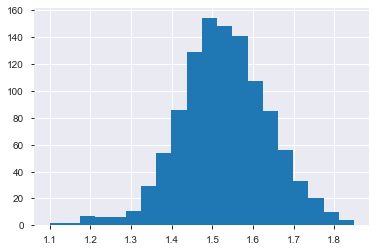

In [37]:
# get the latest dataset

last_date = dataset.index.levels[1].max()
is_last_date = dataset.index.get_level_values('date') == last_date
last_dataset = dataset[is_last_date].copy()


# remove NaN testcases

#print("Some stocks are skipped due to NaN")
#print(last_dataset[last_dataset[feature_names].isnull().sum(axis=1) != 0].index.get_level_values("stock_id").values)
last_dataset = last_dataset.dropna(subset=feature_names)

# predict

vals = model.predict(last_dataset[feature_names].astype(float))
last_dataset['result1'] = pd.Series(vals.swapaxes(0,1)[0], last_dataset.index)

vals = cf.predict(last_dataset[feature_names].astype(float))
last_dataset['result2'] = pd.Series(vals, last_dataset.index)

vals = cf2.predict(last_dataset[feature_names].astype(float))
last_dataset['result3'] = pd.Series(vals, last_dataset.index)

# calculate score

rank = last_dataset['result1'] + last_dataset['result2'] + last_dataset['result3']
condition = (rank >= rank.nlargest(20).iloc[-1]) 

# plot rank distribution
rank.hist(bins=20)


# show the best 20 stocks
rank[condition]

In [ ]:
rank[l]

In [ ]:
from finlab_old.data import Data
data = Data()
big = data.get('三大法人買賣超股數',10000000)

big = big.fillna(0)
bigm = big.rolling(3).sum()
condition1 = (big - bigm)>3*1000

big.reindex(every_month, method='ffill').unstack()
big = pd.DataFrame(big)
big = big.dropna(how='any')
big = big.reset_index().set_index("date")

## 小結論

In [ ]:
con = pd.DataFrame(condition1.unstack()[rd])
con1 = con.pivot_table(index="stock_id",columns="date")
con0 = con.pivot_table(index="date",columns="stock_id")
con1 = con1[0]
con2 = con1["2012-05-25"]

test = dataset_time.reset_index().set_index("stock_id")
test["return"][rd]
con3 = con2[con2].index
con4 = []
for i in con3:
    con4.append(i)
#con4

#test["return"][con4]#.mean()  #成功選出我們所需要的股票

In [ ]:
con01 = con0.reindex(every_month, method='ffill').dropna()
con02 = con01.loc[d][0]
con03 = con02[con02]

con04=[]
for i in con03.index:
    con04.append(i)
if con04!=[]:
    lo = test["return"][con04]
    print(lo)

In [ ]:
import datetime
from finlab.crawler import date_range
#condition1.unstack()[rd]
d= condition1.unstack()[rd].reset_index().set_index("date")
#d = d['2012-05-10']
#d.reindex(every_month, method='ffill')
#new_m = every_month[87:]
#d.reindex(new_m, method='ffill')
new_m = date_range(datetime.date(2012,5,10),datetime.date(2019,8,3))
d.columns


In [ ]:
def leg(n1,n3):
    condition1 = big.rolling(n1).sum() >n3*1000
    return condition1

In [ ]:
def rs1(n1,n2,n3):
    dates = sorted(list(set(dataset_test.index)))
    rs = []
    for d in dates:
        
        dataset_time = dataset_test.loc[d]
        rank = dataset_time['result1'] + dataset_time['result2'] + dataset_time['result3'] 
            
        condition = (rank >= rank.nlargest(n2).iloc[-1]) 
        #r = dataset_time['return'][condition].mean()
            # 開始蝦七八亂改
        rk = dataset_time[condition]['stock_id']
        rd = []
        for n in rk:
            rd.append(n)
    
    #condition1 = big.rolling(n1).sum() >n3*1000
        condition1 = leg(n1,n3)
        con = pd.DataFrame(condition1.unstack()[rd])
    #con1 = con.pivot_table(index="stock_id",columns="date")
        con0 = con.pivot_table(index="date",columns="stock_id")
        con01 = con0.reindex(every_month, method='ffill').dropna()
        con02 = con01.loc[d][0]
        con03 = con02[con02]
        con04=[]
        for i in con03.index:
            con04.append(i)
            
        test = dataset_time.reset_index().set_index("stock_id")
        lo = test["return"][con04].mean()
        #lo = lo.dropna()
        
         #結束蝦七八亂改
        rs.append(lo * (1-3/1000-1.425/1000*2*0.6))
            
    rs = pd.Series(rs, index=dates).cumprod()
    return rs,con04

In [ ]:
rs,l = rs1(68,37,11)
rs = pd.Series(rs, index=dates)

s0050 = close['0050']['2018':]

pd.DataFrame({'nn strategy return':rs.reindex(s0050.index, method='ffill'), '0050 return':s0050/s0050[0]}).plot()

In [ ]:
sorted(rank[l])

In [ ]:
rank[l]